# Connect to downstream Gene Ontology terms.

This notebook showcases the functionality of Omniflow that connects the existing nodes of a network to a phenotype of interest. 

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko.inputs import Universe
from neko._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 3.46 s, sys: 872 ms, total: 4.34 s
Wall time: 4.19 s


### 1. Build network

Please see the [Network building](https://omniflow-project.readthedocs.io/en/latest/notebooks/network_building.html) tutorial for detailed explanations of each step.

In [2]:
genes = ["SRC", "NOTCH1", "FAK"]

In [3]:
new_net1 = Network(genes, resources = 'omnipath')

In [4]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

CPU times: user 34.7 ms, sys: 250 μs, total: 35 ms
Wall time: 34.5 ms


### 2. Connect to Gene Ontology (GO) term

Connect the nodes of the Network with markers of a certain phenotype, from Gene Ontology. 

The _connect_genes_to_phenotype_ function will look for interactions between the nodes of the network and genes annotated with a GO term of interest. The argument _compress_ replaces the individual phenotype-specific genes into one phenotype node.

<div class="alert alert-info">

**Note**
    
We suggest to the users to choose gene ontology terms lower in the hierarcy (e.g., execution phase of apoptosis _versus_ apoptosis) to avoid the inclusion of too many genes.

</div>  

In [5]:
%%time
new_net1.connect_genes_to_phenotype(id_accession="GO:0001837", phenotype="epithelial to mesenchymal transition", only_signed=True, compress=True, maxlen=1)

Start requesting genes from Gene Ontology
Fetching from:  https://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity_label&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22annotation%22&fq=isa_partof_closure:%22GO:0001837%22&fq=taxon_subset_closure_label:%22Homo%20sapiens%22&fq=type:%22protein%22&fq=annotation_class_label:%22epithelial%20to%20mesenchymal%20transition%22&facet.field=aspect&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=evidence_subset_closure_label&facet.field=regulates_closure_label&facet.field=isa_partof_closure_label&facet.field=annotation_class_label&facet.field=qualifier&facet.field=annotation_extension_class_closure_label&facet.field=assigned_by&facet.field=panther_family_label&q=*:*
Done
St

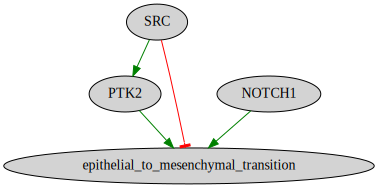

In [6]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()

In [7]:
new_net1.edges

,source,target,Type,Effect,References
0,P12931,Q05397,None,stimulation,Adhesome:10085298;Adhesome:10592173;Adhesome:1...
1,P12931,epithelial_to_mesenchymal_transition,None,inhibition,InnateDB:18840094
2,P46531,epithelial_to_mesenchymal_transition,None,stimulation,HPRD:11604490;NetPath:11604490;SPIKE:11604490;...
3,Q05397,epithelial_to_mesenchymal_transition,None,stimulation,None
4,P46531,epithelial_to_mesenchymal_transition,NaN,stimulation,Gene Ontology
